# SI 618 - Homework #3: Data Visualization

Version 2023.09.21.1.CT

For this homework assignment, you will the small MovieLens dataset, available via https://files.grouplens.org/datasets/movielens/ml-latest-small.zip. Download that file to get the data, and also take some time to go through the [README](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html) file.

Be sure to download your own copy of the dataset -- do not rely on data that you may have downloaded for a previous assignment.

A major challenge for you in this assignment is to devise a plan to tackle each question.  The question states the overall goal, and in some cases hints are provided, but you will need to think carefully about what data you need to answer each of the questions.  You may need to do some preprocessing of the data to get it into a form that you can use for visualization.


Each of the questions is worth the same number of points.  Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

**NOTE**: You are only permitted to use the pandas, Seaborn, and matplotlib libraries for creating visualizations in this assignment. You may use other libraries for other purposes, but you may not use them to create visualizations.

<hr>

First, let's do our usual imports (you might need to import additional modules depending on how you choose to tackle each question):

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

MY_UNIQNAME = 'sudhagar'  # replace this with your uniqname

And let's read the data (note: you might need to include path information if the data files are not in the same directory as this notebook):

In [93]:
movies = pd.read_csv('C:/Users/hp/Downloads/SI 618/SI 618 HW 3/ml-latest-small/movies.csv')
ratings = pd.read_csv('C:/Users/hp/Downloads/SI 618/SI 618 HW 3/ml-latest-small/ratings.csv')
tags = pd.read_csv('C:/Users/hp/Downloads/SI 618/SI 618 HW 3/ml-latest-small/tags.csv')

### Preprocessing the movies dataset -

In [94]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [95]:
# Separating the year and the title from the title column
movies['title_cleaned'] = movies['title'].str.extract(r'^(.*?)\s\(\d{4}\)$')[0]
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)$')

# Convert the 'release_year' column to integers
movies['release_year'] = movies['release_year'].astype('Int64')
movies.head(5)

,movieId,title,genres,title_cleaned,release_year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [96]:
# Checking if any column has null values
null_columns = movies.columns[movies.isnull().any()].tolist()

print("Columns with null values:", null_columns)

Columns with null values: ['title_cleaned', 'release_year']


In [97]:
#dropping the rows with null values

movies.dropna(inplace=True)

### Preprocessing the ratings dataset -

In [98]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [99]:
# Converting the 'timestamp' column to a datetime format and storing it in a new column 'timestamp_cleaned'
# As given in the README, timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
ratings['timestamp_cleaned'] = pd.to_datetime(ratings['timestamp'], unit='s')

ratings.head(5)

,userId,movieId,rating,timestamp,timestamp_cleaned
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51


In [100]:
# Checking if any column has null values
null_columns = ratings.columns[ratings.isnull().any()].tolist()

print("Columns with null values:", null_columns)

Columns with null values: []


### Preprocessing the tags dataset -

In [101]:
tags.head(5)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [102]:
# Converting the 'timestamp' column to a datetime format and storing it in a new column 'timestamp_cleaned'
# As given in the README, timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970
tags['timestamp_cleaned'] = pd.to_datetime(tags['timestamp'], unit='s')

tags.head(5)

,userId,movieId,tag,timestamp,timestamp_cleaned
0,2,60756,funny,1445714994,2015-10-24 19:29:54
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27
4,2,89774,MMA,1445715200,2015-10-24 19:33:20


In [103]:
# Checking if any column has null values
null_columns = tags.columns[tags.isnull().any()].tolist()

print("Columns with null values:", null_columns)

Columns with null values: []


### Q1: 
Using the `movies` DataFrame, create a visualization that shows the number of movies for each decade from the 1900s to the 2010s.  Use the number in parentheses (e.g. (1975)) at the end of the title as the year.  Drop all rows that do not have a valid year. Be sure to include a title and axis labels.

In [104]:
# Check if all years are valid
valid_years = movies['release_year'].between(1900, 2023)

if valid_years.all():
    print("All release years are valid.")
else:
    invalid_movies = movies[~valid_years]
    print("Invalid release years found in the following movies:")
    print(invalid_movies)


All release years are valid.


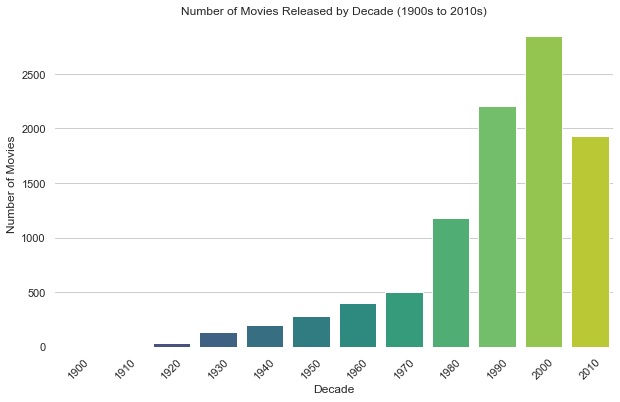

In [105]:
movies['decade'] = (movies['release_year'] // 10) * 10

# Group the data by decade and count the number of movies in each decade
decade_counts = movies['decade'].value_counts().reset_index()
decade_counts.columns = ['Decade', 'Count']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Decade', y='Count', data=decade_counts, palette='viridis')
ax.set(title='Number of Movies Released by Decade (1900s to 2010s)',
       xlabel='Decade',
       ylabel='Number of Movies')
plt.xticks(rotation=45)
sns.despine(left=True, bottom=True)
plt.show()

### <span style="color:red"> Question 1 Explanation - </span>
* Interpretation of the Bar Plot made above -
    * We can observe that most number of movies released in the decade 2000s and the least between 1900 - 1920
    * This shows the rising popularity for movies in the 2000s amongst people
    * We see a continuosly increasing trend in the number of movies released each decade with an exception of decade 2010s where the number of movies released is significantly less than 2000s and 1990s.
    * Inference made from the above statement - the popularity for movies has always been increasing and with the advancement in movie tech over the years, people are more driven towards them which directly affects the number of movies being released by filmmakers

### Q2: 
Create a visualization that shows the number of movies in each genre.

**Hint**: the `pd.DataFrame.explode()` function might be useful here.

Be sure that your axis labels are legible!

In [106]:
# Split the genres into separate rows
movies['genres'] = movies['genres'].str.split('|').astype(object)

# Explode the 'genre' column to create separate rows for each genre
movies_genres = movies.explode('genres')
movies_genres.head(5)


,movieId,title,genres,title_cleaned,release_year,decade
0,1,Toy Story (1995),Adventure,Toy Story,1995,1990
0,1,Toy Story (1995),Animation,Toy Story,1995,1990
0,1,Toy Story (1995),Children,Toy Story,1995,1990
0,1,Toy Story (1995),Comedy,Toy Story,1995,1990
0,1,Toy Story (1995),Fantasy,Toy Story,1995,1990


In [107]:
genre_counts = movies_genres['genres'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

genre_counts

,Genre,Count
0,Drama,4356
1,Comedy,3753
2,Thriller,1891
3,Action,1821
4,Romance,1596
5,Adventure,1260
6,Crime,1197
7,Sci-Fi,975
8,Horror,975
9,Fantasy,777


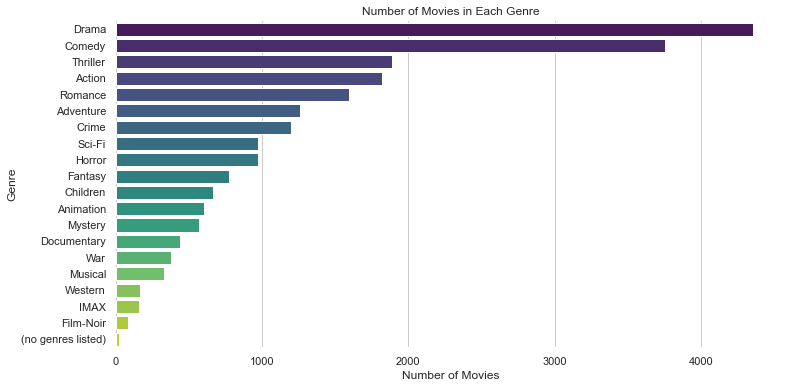

In [108]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Count', y='Genre', data=genre_counts, palette='viridis')
ax.set(title='Number of Movies in Each Genre',
       xlabel='Number of Movies',
       ylabel='Genre')
sns.despine(left=True, bottom=True)
plt.show()

### <span style="color:red"> Question 2 Explanation - </span>
* Interpretation of the Bar Plot made above -
    * Drama is the most common genre in the dataset, followed by comedy and thriller, which shows us the increased demand and the positive response from the audience towards the drama genre
    * Few movies have no genres listed, which might be due to human error in the dataset

### Q3a: 
Create a visualization showing the distribution of the values from the `rating` column of the `ratings` DataFrame.  


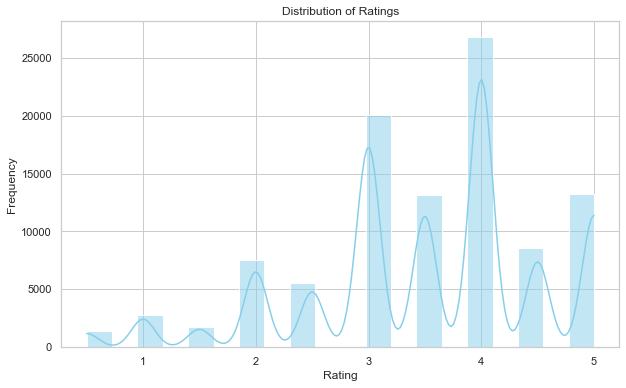

In [109]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.histplot(ratings['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

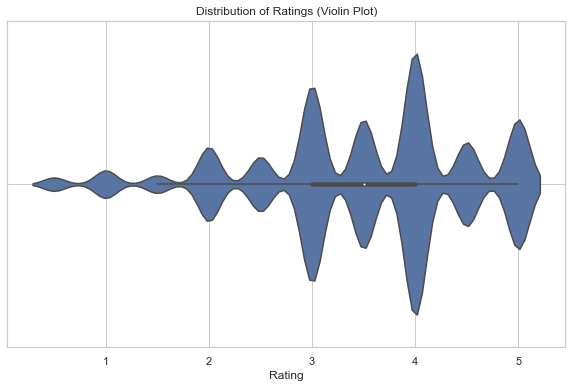

In [110]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=ratings['rating'])
plt.title('Distribution of Ratings (Violin Plot)')
plt.xlabel('Rating')
plt.grid(True)
plt.show()

### <span style="color:red"> Question 3a Explanation - </span>
* From the plots above, we can infer that the most common rating is 4.0, followed by 3.0.
* This shows that most of the users rate movies between 3.0 to 4.0, while ratings on the extreme end of the spectrum are only awarded to few movies which would be excellent (>=4.5) or poor (<=2.0) as per the audience and the critics.

### Q3b:
What do you notice about the relative number of whole-number ratings (1,2,3,4,and 5) compared to the half-ratings (0.5, 1.5, 2.5, 3.5, 4.5)?  Investigate the data further to see if you can figure out why that's the case.  (Hint: a scatterplot showing the ratings vs. time might be helpful.)

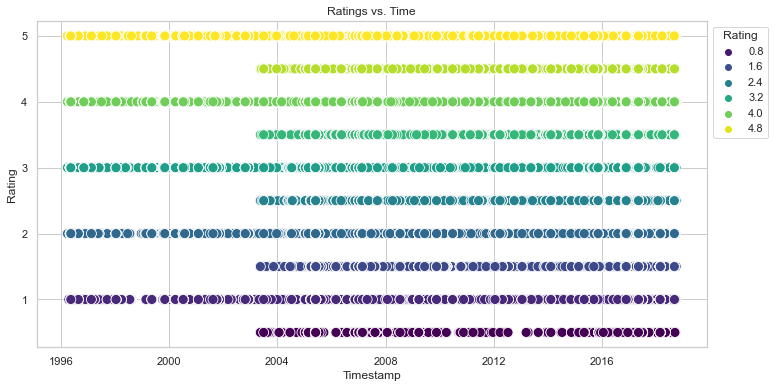

In [111]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='timestamp_cleaned', y='rating', data=ratings, hue='rating', palette='viridis', marker='o', s=100)
plt.title('Ratings vs. Time')
plt.xlabel('Timestamp')
plt.ylabel('Rating')
plt.legend(loc='upper right', bbox_to_anchor=(1.1,1), title='Rating')
plt.show()

### <span style="color:red"> Question 3b Explanation - </span>
* After analysing the bar plot, kde and the violin plot above we can infer that number of whole-number ratings are significantly greater than the half-ratings.
* We can see that number of '1.5' ratings are around 2000 and the number of '1' ratings are around 3000, which shows a significant drop of almost 33% . The same goes for ratings ('2','2.5'), ('3','3.5') and ('4','4.5')

### Q4:
Write code to confirm the assertion that the ratings ["were created by 610 users between March 29, 1996 and September 24, 2018."](https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

In [112]:
import pandas as pd

start_date = pd.to_datetime('1996-03-29')
end_date = pd.to_datetime('2018-09-24')

user_ids = range(1, 611)

filtered_ratings = ratings[(ratings['timestamp_cleaned'] >= start_date) & (ratings['timestamp_cleaned'] <= end_date) & (ratings['userId'].isin(user_ids))]

unique_users = filtered_ratings['userId'].nunique()

if unique_users == 610:
    print("The ratings were created by 610 users between March 29, 1996, and September 24, 2018.")
else:
    print(f"The ratings were not created by 610 users. There are {unique_users} unique users in the specified date range.")


The ratings were created by 610 users between March 29, 1996, and September 24, 2018.


### <span style="color:red"> Question 4 Explanation - </span>
* In the above question we made a custom dataframe 'filtered_ratings' to get those rows which have timestamp between the given start and end dates and which have user id's in range 1 to 610.
* Then we checked the unique number of user id's in 'filtered_ratings' dataframe and using an if-else statement we got to know that the number of unique users are same as the original 'ratings' dataframe

### Q5:
Create a visualization showing the number of ratings produced on each day of the week.  

Hint: the `pd.to_datetime()` function might be useful here, as well as the `dt` accessor.

Make sure your axis labels are in a reasonable order.

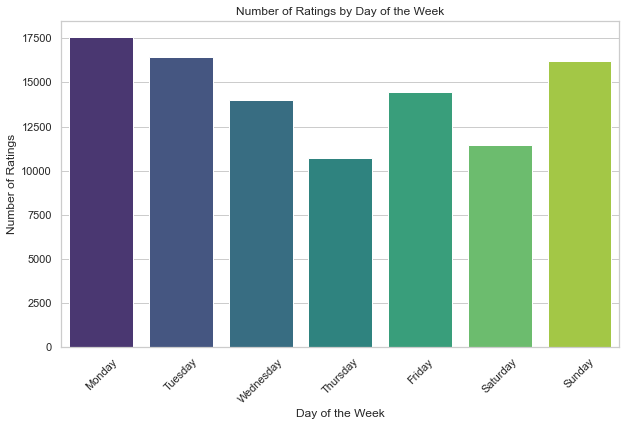

In [113]:
ratings['day_of_week'] = ratings['timestamp_cleaned'].dt.day_name()

# Count the number of ratings for each day of the week
day_counts = ratings['day_of_week'].value_counts().reset_index()
day_counts.columns = ['Day of the Week', 'Count']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='Day of the Week', y='Count', data=day_counts, palette='viridis',
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Ratings by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.show()

### <span style="color:red"> Question 5 Explanation - </span>
* We can observe that the number of ratings are the highest on Monday(almost 17500) followed by Sunday(almost 16000). That might be due to the fact that most of the movies release on Fridays and critics release their first reviews over the weekend.
* The lowest number of ratings can be seen on Thursday.

### Q6a:

Create a new column called `taglength` in the `tags` DataFrame that contains the number of **characters** in the tag.

**Hint:** the `str.len()` function might be useful here.

In [114]:
tags['taglength'] = tags['tag'].str.len()
tags.head(5)

,userId,movieId,tag,timestamp,timestamp_cleaned,taglength
0,2,60756,funny,1445714994,2015-10-24 19:29:54,5
1,2,60756,Highly quotable,1445714996,2015-10-24 19:29:56,15
2,2,60756,will ferrell,1445714992,2015-10-24 19:29:52,12
3,2,89774,Boxing story,1445715207,2015-10-24 19:33:27,12
4,2,89774,MMA,1445715200,2015-10-24 19:33:20,3


### Q6b: 
Create a histogram of your newly created `taglength` column.  Experiment with different numbers of bins (or binwidths) until you're happy with the representation.

In [115]:
import numpy as np
num_bins = int(np.sqrt(len(tags)))
print(f"Square root of number of tags is - {num_bins}")

Square root of number of tags is - 60


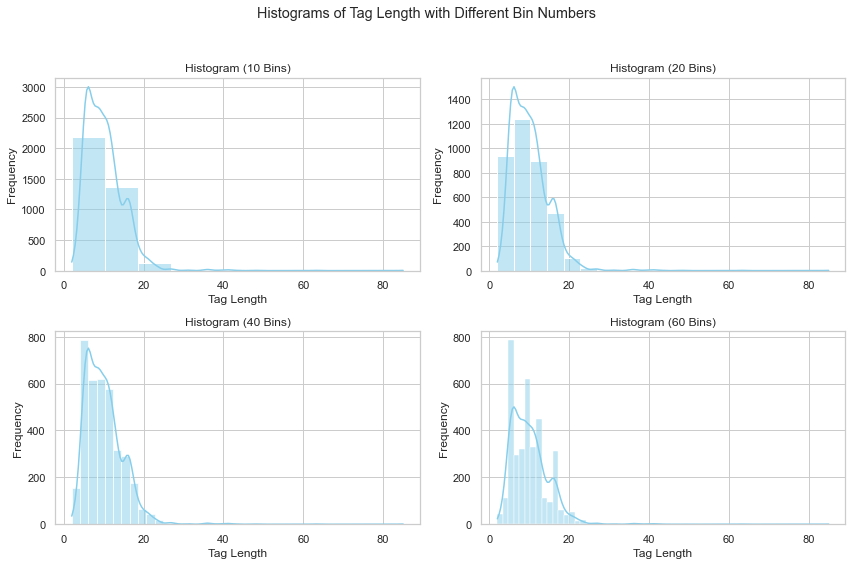

In [116]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Histograms of Tag Length with Different Bin Numbers')

sns.histplot(tags['taglength'], bins=10, color='skyblue', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram (10 Bins)')
axes[0, 0].set_xlabel('Tag Length')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(tags['taglength'], bins=20, color='skyblue', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Histogram (20 Bins)')
axes[0, 1].set_xlabel('Tag Length')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(tags['taglength'], bins=40, color='skyblue', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Histogram (40 Bins)')
axes[1, 0].set_xlabel('Tag Length')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(tags['taglength'], bins=60, color='skyblue', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Histogram (60 Bins)')
axes[1, 1].set_xlabel('Tag Length')
axes[1, 1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

### <span style="color:red"> Question 6 Explanation - </span>
* One way to determine an appropriate starting point for the number of bins is to use the square root of the number of data points and then experiment with different number to suit our needs.
* According to me the best number of bins to represent the the frequency of tag length is 60. This is because we can observe that most of the tags are of length 0-20, so to analyse most number of intervals of taglength we need more number of bins between 0-20 and following the rule in point 1, 60 seems the most appropriate number.

### Q7:
Create a visualization that shows the average rating for each genre.


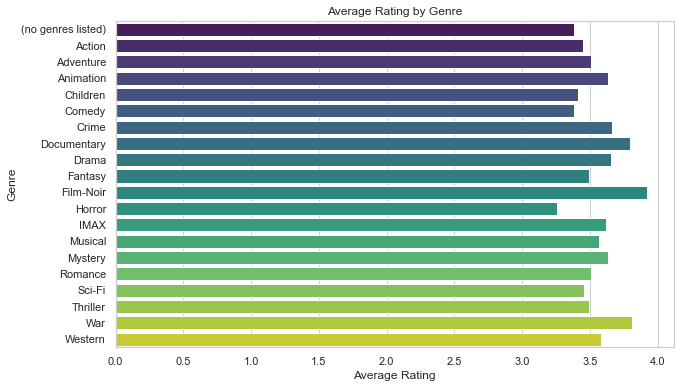

In [117]:
merged_data = pd.merge(ratings, movies_genres, on='movieId')
# Group the data by genre and calculate the average rating for each genre
genre_avg_rating = merged_data.groupby('genres')['rating'].mean().reset_index()

# Create a bar plot to visualize the average rating for each genre
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.barplot(x='rating', y='genres', data=genre_avg_rating, palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

### <span style="color:red"> Question 7 Explanation - </span>
* By analysing the bar plot above we can infer that the genre 'Film-Noir' has the highest average rating of around 3.9 and the genre 'Horror' has the lowest genre rating of around 3.25
* This shows us the preference of the audience and their admiration for the genre 'Film-Noir'
* We see low ratings for the genre 'Horror' because it has a very niche audience and might not appeal to the masses.  

### Q8:
Create a visualization that shows the distribution of the **number** of ratings of "good" movies (i.e., those with a mean rating of 3.5 or highter) and "bad" movies (i.e., those with a mean rating of less than 3.5), broken down by the decade when the movie was released.

**Hint:** You will need to join the `movies` and `ratings` DataFrames to get the decade information.

**Hint:** You may want to create a box plot or a violin plot (or both).

In [118]:
movie_mean_ratings = merged_data.groupby('movieId')['rating'].mean().reset_index()

# Merge 'movie_mean_ratings' back with 'movies' DataFrame to get the decade information
movies_with_ratings = pd.merge(movies, movie_mean_ratings, on='movieId')
movies_with_ratings['category'] = np.where(movies_with_ratings['rating'] >= 3.5, 'good', 'bad')
movies_with_ratings

,movieId,title,genres,title_cleaned,release_year,decade,rating,category
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",Toy Story,1995,1990,3.920930,good
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",Jumanji,1995,1990,3.431818,bad
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",Grumpier Old Men,1995,1990,3.259615,bad
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",Waiting to Exhale,1995,1990,2.357143,bad
4,5,Father of the Bride Part II (1995),[Comedy],Father of the Bride Part II,1995,1990,3.071429,bad
...,...,...,...,...,...,...,...,...
9695,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",Black Butler: Book of the Atlantic,2017,2010,4.000000,good
9696,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",No Game No Life: Zero,2017,2010,3.500000,good
9697,193585,Flint (2017),[Drama],Flint,2017,2010,3.500000,good
9698,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",Bungo Stray Dogs: Dead Apple,2018,2010,3.500000,good


<AxesSubplot:xlabel='decade'>

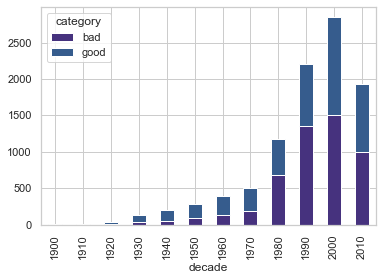

In [119]:
colors = sns.color_palette("viridis")
movies_with_ratings.groupby(["decade", "category"]).size().unstack().plot(kind="bar", stacked=True, color=colors)

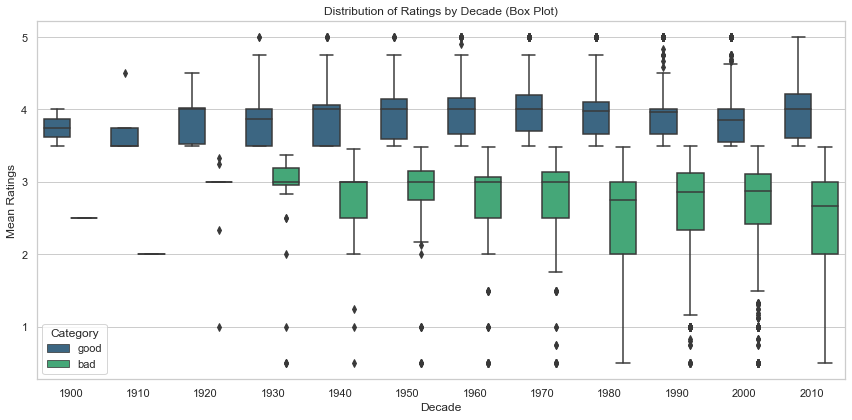

In [120]:
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
# Create a box plot
sns.boxplot(data=movies_with_ratings, x='decade', y='rating', hue='category', palette='viridis')
plt.title('Distribution of Ratings by Decade (Box Plot)')
plt.xlabel('Decade')
plt.ylabel('Mean Ratings')
plt.legend(title='Category', loc='lower left')

plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

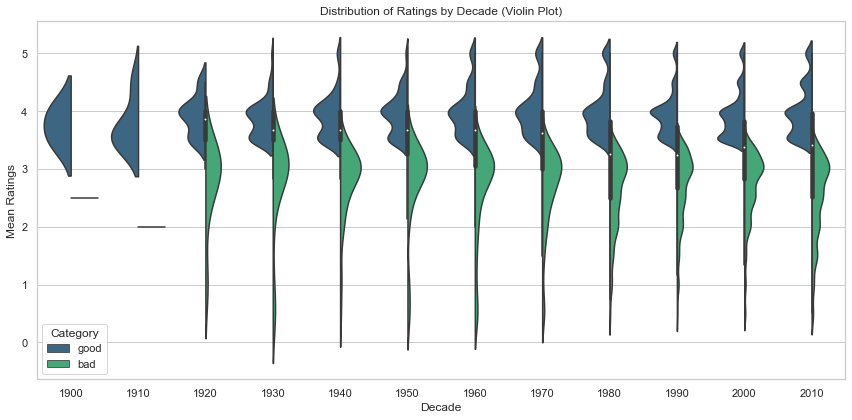

In [121]:
plt.figure(figsize=(12, 6))
sns.set(style='whitegrid')
# Create a violin plot
sns.violinplot(data=movies_with_ratings, x='decade', y='rating', hue='category', palette='viridis',split=True)
plt.title('Distribution of Ratings by Decade (Violin Plot)')
plt.xlabel('Decade')
plt.ylabel('Mean Ratings')
plt.legend(title='Category', loc='lower left')

plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

### <span style="color:red"> Question 8 Explanation - </span>

* From the box plot we infer, as the number of movies show an increasing trend in the decades of 1990s and 2000s, that has increased the overall range and distribution span of the ratings themselves.
* This implies that the number of movies produced has increased, so has the mean ratings and qualities of movies also dropped as the outliers are too many on the lower side of the <b>1.5*(IQR)</b>.
* Decade 1910s, was too bad a decade for movies, as the bad movies' median is the lowest among all decades.

### END OF NOTEBOOK